
=== Loading and Preparing Data ===
Data loaded successfully with 280 valid rows.

--- Training Model 1: Pump Control (KNN) ---
Pump control KNN model training complete.
Saved 'pump_control_knn_model.pkl' and 'pump_scaler.pkl'.
Pump Model Accuracy: 0.9286

Pump Classification Report:
              precision    recall  f1-score   support

Pump OFF (0)       0.96      0.96      0.96        77
 Pump ON (1)       0.57      0.57      0.57         7

    accuracy                           0.93        84
   macro avg       0.77      0.77      0.77        84
weighted avg       0.93      0.93      0.93        84

Saved confusion matrix as 'pump_knn_confusion_matrix.png'.

--- Training Model 2: Leak Detection (KNN) ---
Leak detection KNN model training complete.
Saved 'leak_detection_knn_model.pkl' and 'leak_scaler.pkl'.
Leak Model Accuracy: 1.0000

Leak Classification Report:
              precision    recall  f1-score   support

Inactive (0)       1.00      1.00      1.00        76
  Active (1

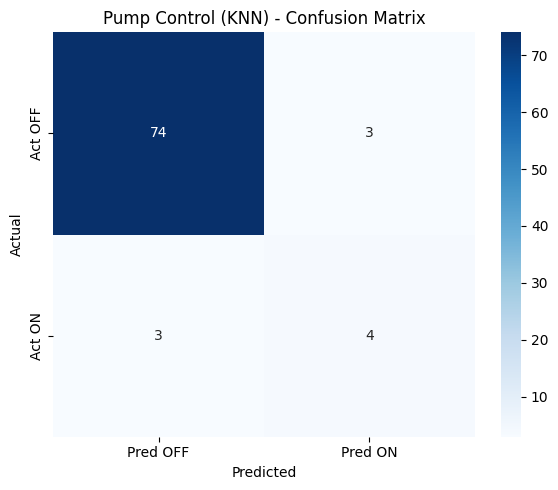

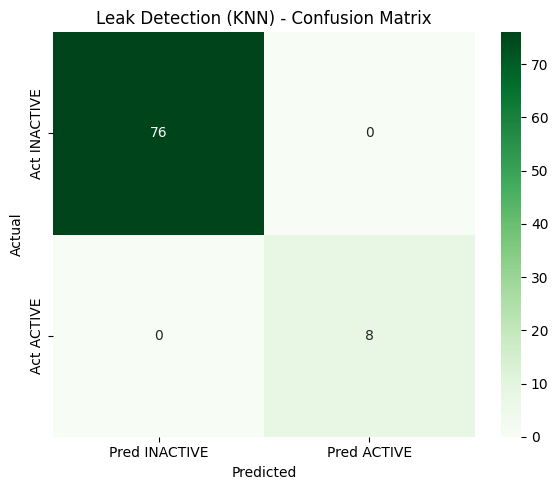

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# --- 1. Load and Prepare Data ---
print("\n=== Loading and Preparing Data ===")
try:
    df = pd.read_csv('data/training_dataset_01.csv')
except FileNotFoundError:
    print("Error: 'training_dataset_01.csv' not found.")
    exit()

# Convert timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.dropna(subset=['timestamp'], inplace=True)
df['hour'] = df['timestamp'].dt.hour

print(f"Data loaded successfully with {len(df)} valid rows.")
print("=" * 50)

# --- 2. Model 1: Pump Control (KNN) ---
print("\n--- Training Model 1: Pump Control (KNN) ---")

# Features & target
X_pump = df[['water_level_percent']]
y_pump = df['pump_signal_target']

# Split
X_train_pump, X_test_pump, y_train_pump, y_test_pump = train_test_split(
    X_pump, y_pump, test_size=0.3, random_state=42
)

# Scale features (very important for KNN)
scaler_pump = StandardScaler()
X_train_pump_scaled = scaler_pump.fit_transform(X_train_pump)
X_test_pump_scaled = scaler_pump.transform(X_test_pump)

# Train KNN
pump_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
pump_model.fit(X_train_pump_scaled, y_train_pump)
print("Pump control KNN model training complete.")

# Save model & scaler
joblib.dump(pump_model, 'model/pump_control_knn_model.pkl')
joblib.dump(scaler_pump, 'model/pump_scaler.pkl')
print("Saved 'pump_control_knn_model.pkl' and 'pump_scaler.pkl'.")

# Evaluate
y_pred_pump = pump_model.predict(X_test_pump_scaled)
accuracy_pump = accuracy_score(y_test_pump, y_pred_pump)
print(f"Pump Model Accuracy: {accuracy_pump:.4f}")

print("\nPump Classification Report:")
print(classification_report(y_test_pump, y_pred_pump, target_names=['Pump OFF (0)', 'Pump ON (1)']))

# Confusion matrix
cm_pump = confusion_matrix(y_test_pump, y_pred_pump)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_pump, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred OFF', 'Pred ON'], yticklabels=['Act OFF', 'Act ON'])
plt.title('Pump Control (KNN) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('model/pump_knn_confusion_matrix.png')
print("Saved confusion matrix as 'pump_knn_confusion_matrix.png'.")
print("=" * 50)

# --- 3. Model 2: Leak Detection (KNN) ---
print("\n--- Training Model 2: Leak Detection (KNN) ---")

# Features & target
X_leak = df[['hour', 'water_level_percent', 'water_volume_litres']]
y_leak = df['leak_detection_active_target']

# Split
X_train_leak, X_test_leak, y_train_leak, y_test_leak = train_test_split(
    X_leak, y_leak, test_size=0.3, random_state=42
)

# Scale
scaler_leak = StandardScaler()
X_train_leak_scaled = scaler_leak.fit_transform(X_train_leak)
X_test_leak_scaled = scaler_leak.transform(X_test_leak)

# Train KNN
leak_model = KNeighborsClassifier(n_neighbors=7, weights='distance')
leak_model.fit(X_train_leak_scaled, y_train_leak)
print("Leak detection KNN model training complete.")

# Save model & scaler
joblib.dump(leak_model, 'model/leak_detection_knn_model.pkl')
joblib.dump(scaler_leak, 'model/leak_scaler.pkl')
print("Saved 'leak_detection_knn_model.pkl' and 'leak_scaler.pkl'.")

# Evaluate
y_pred_leak = leak_model.predict(X_test_leak_scaled)
accuracy_leak = accuracy_score(y_test_leak, y_pred_leak)
print(f"Leak Model Accuracy: {accuracy_leak:.4f}")

print("\nLeak Classification Report:")
print(classification_report(y_test_leak, y_pred_leak, target_names=['Inactive (0)', 'Active (1)']))

# Confusion matrix
cm_leak = confusion_matrix(y_test_leak, y_pred_leak)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_leak, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred INACTIVE', 'Pred ACTIVE'],
            yticklabels=['Act INACTIVE', 'Act ACTIVE'])
plt.title('Leak Detection (KNN) - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('model/leak_knn_confusion_matrix.png')
print("Saved confusion matrix as 'leak_knn_confusion_matrix.png'.")
print("=" * 50)

print("\n✅ All tasks complete using KNN.")